In [1]:
get_ipython().magic(u'matplotlib inline')
import csv
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("C:\Users\Javi\Desktop\Coursera\Python\\frame1.csv")
data.head()


,Unnamed: 0,Position,Teams,Games Played,Wins,Lost,Draw,GF,GA,Points,Yellow Cards,Red Cards
0,0,1,Manchester United,42,24,6,12,67,31,84,32,0
1,1,2,Aston Villa,42,21,10,11,57,40,74,23,0
2,2,3,Norwich,42,21,12,9,61,65,72,22,0
3,3,4,Blackburn Rovers,42,20,11,11,68,46,71,37,3
4,4,5,Queens Park Rangers,42,17,13,12,63,55,63,36,0


In [2]:
teamDict = {}

for i in range(len(data.Position)):
    teamDict[i] = [[data.Wins[i].astype('int'), data.GF[i].astype('int'), data.Points[i].astype('int')],
                   [data.Position[i].astype('int'), str(data.Teams[i])]]
    


In [3]:
teamDict

{0: [[24, 67, 84], [1, 'Manchester United']],
 1: [[21, 57, 74], [2, 'Aston Villa']],
 2: [[21, 61, 72], [3, 'Norwich']],
 3: [[20, 68, 71], [4, 'Blackburn Rovers']],
 4: [[17, 63, 63], [5, 'Queens Park Rangers']],
 5: [[16, 62, 59], [6, 'Liverpool']],
 6: [[15, 55, 59], [7, 'Sheffield Wednesday']],
 7: [[16, 60, 59], [8, 'Tottenham']],
 8: [[15, 56, 57], [9, 'Manchester City']],
 9: [[15, 40, 56], [10, 'Arsenal']],
 10: [[14, 51, 56], [11, 'Chelsea']],
 11: [[14, 56, 54], [12, 'Wimbledon']],
 12: [[15, 53, 53], [13, 'Everton']],
 13: [[14, 54, 52], [14, 'Sheffield']],
 14: [[13, 52, 52], [15, 'Coventry']],
 15: [[12, 50, 52], [16, 'Ipswich Town']],
 16: [[12, 57, 51], [17, 'Leeds']],
 17: [[13, 54, 50], [18, 'Southampton']],
 18: [[13, 63, 49], [19, 'Oldham']],
 19: [[11, 48, 49], [20, 'Crystal Palace']],
 20: [[11, 54, 44], [21, 'Middlesbrough']],
 21: [[10, 41, 40], [22, 'Nottingham Forest']],
 22: [[27, 80, 92], [1, 'Manchester United']],
 23: [[25, 63, 84], [2, 'Blackburn Rovers']

So what are we doing?

Well, the KNN algorithm will try to predict a point based on how similar this point is from its neighbors. We will feed the algorithm a point at random, then we will calculate the point's distance from the rest of the training set. Once the distances have been calculated, we will rank them (using the classifier function below) from shortest-to-longest distance and then retrieve the k nearest neighbors. 

To make the prediction, we will take the majority vote from the k nearest neighbors. 

In [4]:
from scipy import spatial

def distance(train, test):
    return spatial.distance.euclidean(train[0], test[0])
        
distance(teamDict[90], teamDict[94])



14.89966442575134

The function above calculates the distance between two points. The function below does a couple of things:
1. Calculates the distance between the test point and everything point in the training set.
2. Sorts the distances from shortest to longest
3. Returns the k nearest neighbors from the test point. 

Note: I stored the training and test sets in a list for every key. We are going to measure the distances for the features (first element of the list). The second element in the list contains the labels or classes. See the teamDict element above.
    

In [5]:
import operator
import collections

def getNeighbor(train, test, k):
    distance = []
    for key in train:
        team = train[key][1]
        dist = (spatial.distance.euclidean(train[key][0], test[0]))
        distance.append((team, dist))
    distance.sort(key=operator.itemgetter(1))

    'getting neighbors'
    neighbors = []
    for i in range(len(distance)):
        for x in range(k):
            if distance[i][1] == 0.0:
                neighbors.append(distance[x+1][0][0])
            else: 
                neighbors.append(distance[x][0][0])
        return neighbors      

'You want to feed it like a dictionary!'
'Wins, GF, Points'


x = [[20, 65, 71], ['Arsenal']]
result = getNeighbor(teamDict, teamDict[0], 3)
print teamDict[0]
print result


[[24, 67, 84], [1, 'Manchester United']]
[3, 2, 2]


The function below will return the majority vote for the neighbors.

In [6]:
import numpy as np

def classifier(neighbors):
    counter = collections.Counter(neighbors)
  
    a = []; b=[]; c={}; d={}

    for x, y in counter.items():
        if y > 1:
            a.append((x,y))
        else:
            b.append((x,y))
    if len(a) >=1 :
        for i in range(len(a)):
            c[a[i][0]] = a[i][1]
            
        prediction = sorted(c.iteritems(), key = operator.itemgetter(1), reverse=True)[0]
        return prediction[0]
    else:
    # I have modified the condition to return the neighbor that is the nearest to our test point whenever we see a tie!
        for i in range(len(b)):
            d[b[i][0]] = b[i][1]
        xx = []
        for x in range(len(d)):
            xx.append(sorted(d.iteritems(), key = operator.itemgetter(1), reverse = False)[x][0])
        return xx[0]
  

classifier(getNeighbor(teamDict, x, 3))

5

I am going to download our test set, which is going to be the latestr EPL season 2015-2016. We will test our algorithm's performance.

In [7]:
frame = pd.read_csv("C:\Users\Javi\Desktop\Coursera\Python\Projects\K Nearest Neighbours\EPL2015-2016.csv")

In [8]:
frame.head()

,Unnamed: 0,Position,Teams,Games Played,Wins,Lost,Draw,GF,GA,Points,Yellow Cards,Red Cards
0,0,1,Leicester,38,23,3,12,68,36,81,51,3
1,1,2,Arsenal,38,20,7,11,65,36,71,42,4
2,2,3,Tottenham,38,19,6,13,69,35,70,71,0
3,3,4,Manchester City,38,19,10,9,71,41,66,58,0
4,4,5,Manchester United,38,19,10,9,49,35,66,66,1


In [9]:
currentSeason = {}

for i in range(len(frame.Position)):
    currentSeason[i] = [[int(frame.Wins[i]), int(frame.GF[i]), int(frame.Points[i])], [int(frame.Position[i]), frame.Teams[i]]]

In [10]:
currentSeason

{0: [[23, 68, 81], [1, 'Leicester']],
 1: [[20, 65, 71], [2, 'Arsenal']],
 2: [[19, 69, 70], [3, 'Tottenham']],
 3: [[19, 71, 66], [4, 'Manchester City']],
 4: [[19, 49, 66], [5, 'Manchester United']],
 5: [[18, 59, 63], [6, 'Southampton']],
 6: [[16, 65, 62], [7, 'West Ham']],
 7: [[16, 63, 60], [8, 'Liverpool']],
 8: [[14, 41, 51], [9, 'Stoke City']],
 9: [[12, 59, 50], [10, 'Chelsea']],
 10: [[11, 59, 47], [11, 'Everton']],
 11: [[12, 42, 47], [12, 'Swansea']],
 12: [[12, 40, 45], [13, 'Watford']],
 13: [[10, 34, 43], [14, 'West Bromwich']],
 14: [[11, 39, 42], [15, 'Crystal Palace']],
 15: [[11, 45, 42], [16, 'Bournemouth']],
 16: [[9, 48, 39], [17, 'Sunderland']],
 17: [[9, 44, 37], [18, 'Newcastle']],
 18: [[9, 39, 34], [19, 'Norwich']],
 19: [[3, 27, 17], [20, 'Aston Villa']]}

In [11]:
def Test(train, test, a):
    compTable = []
    actual =[]
    for key in test:
        x = getNeighbor(train,test[key],a) 
        c = classifier(x)
        compTable.append(c)
        actual.append(test[key][1])

    correct = 0
    for x in range(len(compTable)):
        #print compTable[x], actual[x][0]
        if compTable[x] == actual[x][0]:
            correct += 1
    print "Our classifier was able to predict for", a, "neighbors", round(((correct/float(len(compTable))) * 100.0)), "% correct values!"
Test(teamDict, currentSeason, 3)
Test(teamDict, currentSeason, 2)
Test(teamDict, currentSeason, 1)


Our classifier was able to predict for 3 neighbors 15.0 % correct values!
Our classifier was able to predict for 2 neighbors 20.0 % correct values!
Our classifier was able to predict for 1 neighbors 25.0 % correct values!


Okay so our Classifier wasn't that accurate with this data! I am thinking that the GA variable varies too much and it's not a good predictor, maybe having  a variable for goal difference could give better results. Below I will calculate the variance for different variables in our dataframe. 

What do we now? Well, we can try different data!

In [12]:
import numpy as np
print "The variance for Goals in favor is %d" %(np.var(data.GA))
print "The SD for Goals in favor is %d" %np.std(data.GA)
print 
print "The variance for Points is %d" %np.var(data.Points)
print "The SD for Points is %d" %np.std(data.Points)

The variance for Goals in favor is 158
The SD for Goals in favor is 12

The variance for Points is 247
The SD for Points is 15


Well the results above proved me wrong. My second guess is that the EPL is a league that varies a lot in terms of points.
Let's take Arsenal for example. They ended up in second with 71 points, but the closest neighbors with similar characteristics ended up in 5th and 6th.

In [13]:
print currentSeason[1]
getNeighbor(teamDict, currentSeason[1], 3)

[[20, 65, 71], [2, 'Arsenal']]


[5, 5, 6]

So my algorithm didn't perform well with this data. Let me see if I can apply with different data, perhaps predicting the type of pass for a team in a game. This could help us analyze the passing game for a team.

In [14]:
df = pd.read_csv("C:\Users\Javi\Desktop\Coursera\Python\Projects\K Nearest Neighbours\Opta.csv")

In [15]:
df.head()

,Unnamed: 0,min,sec,x,y,name,q_name,keypass,team_id,event_id,assist,outcome,value,id_x
0,0,0,0,0,0,Team set up,Involved,NaN,2012,1,NaN,1,"14056, 20779, 9895, 17839, 21104, 17561, 5064,...",NaN
1,1,0,0,0,0,Team set up,Involved,NaN,2012,1,NaN,1,"18193, 18257, 19490, 20379, 41452, 18196, 6627...",NaN
2,2,0,0,0,0,Team set up,Team Player Formation,NaN,2012,1,NaN,1,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",NaN
3,3,0,0,0,0,Team set up,Team Player Formation,NaN,2012,1,NaN,1,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",NaN
4,4,0,0,0,0,Team set up,Team Formation,NaN,2012,1,NaN,1,4,NaN


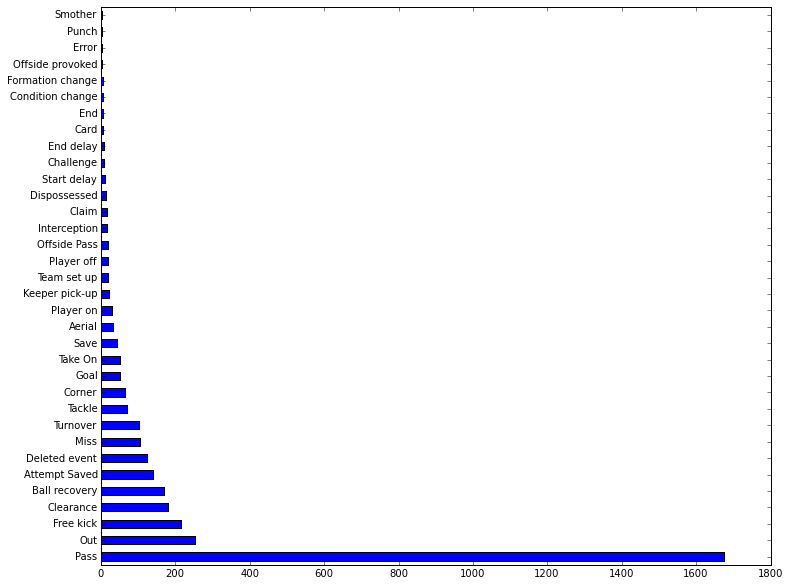

In [16]:
plt.figure()
counting_events = df['name'].value_counts()

counting_events.plot(kind = 'barh', figsize=(12, 10))

We are going to analyze the most common event in the data frame- I will focus on complete events!

In [17]:
df.columns
passes = df[(df.outcome == 1) & (df.name == 'Pass')]
passes = passes[[3,4,6]]
passes.describe()

,x,y
count,450.000000,450.000000
mean,44.787556,51.419556
std,21.980357,30.386503
min,2.900000,0.000000
25%,31.425000,27.150000
50%,39.800000,53.300000
75%,58.200000,73.400000
max,99.500000,100.000000


In [18]:
from pandas import DataFrame
x = []
y =[]
q_name = []
for xx,yy in zip(passes.x, passes.y):
    x.append(xx)
    y.append(yy)

for item in passes.q_name:
    q_name.append(item)
dat = {'x' : x, 'y':y, 'q_name': q_name}   

passes = DataFrame(data = dat,
                  columns = ['x', 'y', 'q_name'])
     

We had to create another dataframe because python cannot perform the below operation on subsets of dataframes! Learned that the hard way!!!!!!

In [19]:
Events = {}

for i in range(len(passes.x)):
    Events[i] = [[passes.x[i], passes.y[i]], [passes.q_name[i]]]
Events[300]


[[69.400000000000006, 91.400000000000006], ['Regular play']]

Let's see what types of passes are more likely to happen.

In [20]:
p = [[1, 50]]
q = [[90, 10]]
getNeighbor(Events, q,3)

['Long ball', 'Chipped', 'Cross']

Now let's try to make some predictions!

In [21]:
classifier(getNeighbor(Events, q, 3))

'Long ball'

Let's get sample of our training set, which is the whole data set!

In [22]:
import random
ts = []; tt = []

for i in range(len(Events)):
    if random.random() < 0.65:
        ts.append(Events[i])
    else:
        tt.append(Events[i])
        
training_set = {}; test_set = {}

for i in range(len(ts)):
    training_set[i] = ts[i]
for i in range(len(tt)):
    test_set[i] = tt[i]
    

print len(training_set)
print len(test_set)


292
158


In [23]:
Events
test_set

{0: [[36.899999999999999, 42.5], ['Long ball']],
 1: [[46.200000000000003, 50.5], ['Foul']],
 2: [[39.600000000000001, 87.400000000000006], ['Long ball']],
 3: [[39.600000000000001, 87.400000000000006], ['Free kick taken']],
 4: [[39.799999999999997, 53.200000000000003], ['Long ball']],
 5: [[39.799999999999997, 53.200000000000003], ['Free kick taken']],
 6: [[36.299999999999997, 80.099999999999994], ['Free kick taken']],
 7: [[25.800000000000001, 91.099999999999994], ['Foul']],
 8: [[8.9000000000000004, 46.100000000000001], ['Long ball']],
 9: [[27.300000000000001, 72.299999999999997], ['Long ball']],
 10: [[53.600000000000001, 27.699999999999999], ['Free kick taken']],
 11: [[31.0, 70.0], ['Long ball']],
 12: [[4.7000000000000002, 46.100000000000001], ['Long ball']],
 13: [[31.100000000000001, 38.5], ['Long ball']],
 14: [[31.100000000000001, 38.5], ['Chipped']],
 15: [[55.700000000000003, 90.599999999999994], ['Chipped']],
 16: [[38.600000000000001, 68.200000000000003], ['Chipped']]

We are going to test our algorithm with this data! Hopefully it'll perform better!

In [24]:
Test(Events, test_set, 3)
Test(Events, test_set, 2)
Test(Events, test_set, 1)

Our classifier was able to predict for 3 neighbors 37.0 % correct values!
Our classifier was able to predict for 2 neighbors 36.0 % correct values!
Our classifier was able to predict for 1 neighbors 42.0 % correct values!


Okay, so the next data set contains players' performances during the 2011-12 EPL season. 

In [25]:
players = pd.read_excel("C:\Users\Javi\Desktop\Coursera\Python\Projects\K Nearest Neighbours\\Premier League 2011-12 Match by Match.xls",
                       sheetname = 'Sheet3')

In [56]:
players.head(5)

,Index,PlayerID,LastName,FirstName,Appearances,TimePlayed,Starts,SubstituteOn,SubstituteOff,Goals,...,PassForward,PassBackward,PassLeft,PassRight,UnsuccessfulBallTouch,SuccessfulBallTouch,Take-OnsOverrun,Touchesopenplayfinalthird,Touchesopenplayoppbox,Touchesopenplayoppsixyards
0,0,3,Giggs,Ryan,25,1466,14,11,3,2,...,368,110,387,243,25,13,3,386,44,2
1,1,363,Scholes,Paul,17,1169,14,3,9,4,...,239,95,439,364,10,5,0,208,10,3
2,2,973,Woodgate,Jonathan,17,1282,16,1,8,0,...,162,35,44,56,4,10,1,31,3,1
3,3,999,Smith,Alan,2,5,0,2,0,0,...,4,1,1,2,0,0,0,1,0,0
4,4,1059,Gabbidon,Daniel,17,1424,15,2,1,0,...,207,44,85,88,5,13,0,20,8,2


In [27]:
nn = list(players.columns)

In [28]:
xx = []
for i in nn:
    xx.append(i.encode("utf-8"))
                
xx[0:4]

['Index', 'PlayerID', 'LastName', 'FirstName']

In [29]:
names = []
for i in range(0,200):
    names.append(xx[i])
names

['Index',
 'PlayerID',
 'LastName',
 'FirstName',
 'Appearances',
 'TimePlayed',
 'Starts',
 'SubstituteOn',
 'SubstituteOff',
 'Goals',
 'WinningGoal',
 'ShotsOnTargetincgoals',
 'BlockedShots',
 'PenaltyGoals',
 'DirectFree-kickGoals',
 'DirectFree-kickOnTarget',
 'BlockedDirectFree-kick',
 'GoalsfromInsideBox',
 'ShotsOnfromInsideBox',
 'ShotsOfffromInsideBox',
 'BlockedShotsfromInsideBox',
 'ShotsOnTargetOutsideBox',
 'GoalsfromOutsideBox',
 'ShotsOffTargetOutsideBox',
 'BlockedShotsOutsideBox',
 'HeadedGoals',
 'HeadedShotsOnTarget',
 'HeadedBlockedShots',
 'HeadedShotsOffTarget',
 'LeftFootGoals',
 'LeftFootShotsOnTarget',
 'LeftFootShotsOffTarget',
 'LeftFootBlockedShots',
 'RightFootGoals',
 'RightFootShotsOnTarget',
 'RightFootShotsOffTarget',
 'RightFootBlockedShots',
 'OtherGoals',
 'OtherShotsOnTarget',
 'OtherShotsOffTarget',
 'OtherBlockedShots',
 'ShotsClearedoffLine',
 'ShotsClearedoffLineInsideArea',
 'ShotsClearedoffLineOutsideArea',
 'GoalsOpenPlay',
 'GoalsfromCorne

In [30]:
w = players.as_matrix(columns = names)

In [31]:
play = {}
for i in range(len(w)):
    play[i] = [[w[i][4:]], [w[i][0:4]]]

In [32]:
RyanGiggs = play[0]

So for Ryan Giggs, we see that the most similar player is James Milner, who was at the time playing for Manchester City. 

In [33]:
getNeighbor(play, RyanGiggs ,3)

[array([184L, 15157L, u'Milner', u'James'], dtype=object),
 array([32L, 1814L, u'Gerrard', u'Steven'], dtype=object),
 array([204L, 16045L, u'Watson', u'Ben'], dtype=object)]

In [34]:
FrankLampard= play[49]

In [35]:
getNeighbor(play, FrankLampard ,3)

[array([78L, 4611L, u'van der Vaart', u'Rafael'], dtype=object),
 array([219L, 17812L, u'Fox', u'David'], dtype=object),
 array([266L, 19921L, u'Meireles', u'Raul'], dtype=object)]

In [36]:
VanDerVaart = play[78]
getNeighbor(play, VanDerVaart ,3)

[array([410L, 43670L, u'Mata', u'Juan'], dtype=object),
 array([320L, 28554L, u'Nasri', u'Samir'], dtype=object),
 array([49L, 2051L, u'Lampard', u'Frank'], dtype=object)]

In [37]:
Essien = play[112]
getNeighbor(play, Essien ,3)

[array([495L, 78056L, u'Romeu', u'Oriol'], dtype=object),
 array([407L, 43191L, u'Lucas Leiva', 0], dtype=object),
 array([81L, 4990L, u'Diarra', u'Mahamadou'], dtype=object)]

In [39]:
Rooney = play[156]
getNeighbor(play, Rooney ,3)

[array([410L, 43670L, u'Mata', u'Juan'], dtype=object),
 array([333L, 36903L, u'Bale', u'Gareth'], dtype=object),
 array([387L, 41184L, u'Fellaini', u'Marouane'], dtype=object)]

In [55]:
firstTen = []

firstTen.append(play[173])

for i in range(0,20):
    firstTen.append(play[i])
    
for items in firstTen:
    print (items[1], getNeighbor(play, items ,1))

([array([173L, 14664L, u'Yaya Tour\xe9', 0], dtype=object)], [array([115L, 8758L, u'Arteta', u'Mikel'], dtype=object)])
([array([0L, 3L, u'Giggs', u'Ryan'], dtype=object)], [array([184L, 15157L, u'Milner', u'James'], dtype=object)])
([array([1L, 363L, u'Scholes', u'Paul'], dtype=object)], [array([317L, 28495L, u'Mikel', u'John Obi'], dtype=object)])
([array([2L, 973L, u'Woodgate', u'Jonathan'], dtype=object)], [array([186L, 15201L, u'Barnett', u'Leon'], dtype=object)])
([array([3L, 999L, u'Smith', u'Alan'], dtype=object)], [array([527L, 95703L, u'Lancaster', u'Cameron'], dtype=object)])
([array([4L, 1059L, u'Gabbidon', u'Daniel'], dtype=object)], [array([277L, 20359L, u'Samba', u'Christopher'], dtype=object)])
([array([5L, 1131L, u'Bramble', u'Titus'], dtype=object)], [array([300L, 27348L, u'Tamas', u'Gabriel'], dtype=object)])
([array([6L, 1195L, u'Johnson', u'Andrew'], dtype=object)], [array([203L, 16005L, u'Best', u'Leon'], dtype=object)])
([array([7L, 1212L, u'Wright-Phillips', u'S

In [54]:
getNeighbor(play, play[186], 1)

[array([2L, 973L, u'Woodgate', u'Jonathan'], dtype=object)]